# Regresión Lineal

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv('../Datasets/publicidad.csv')
data.head(5)

,TV,Diarios,Radio,Ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


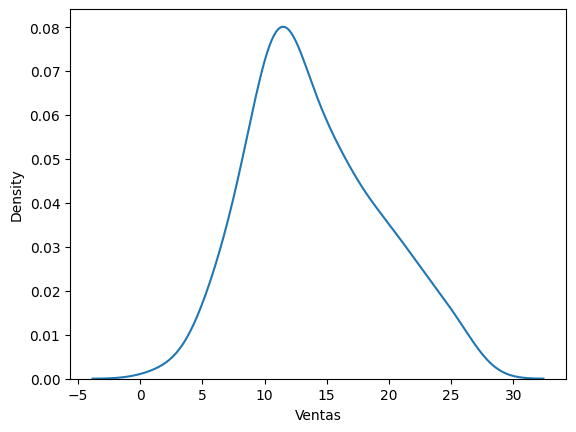

In [4]:
sns.kdeplot(data.Ventas)
plt.show()

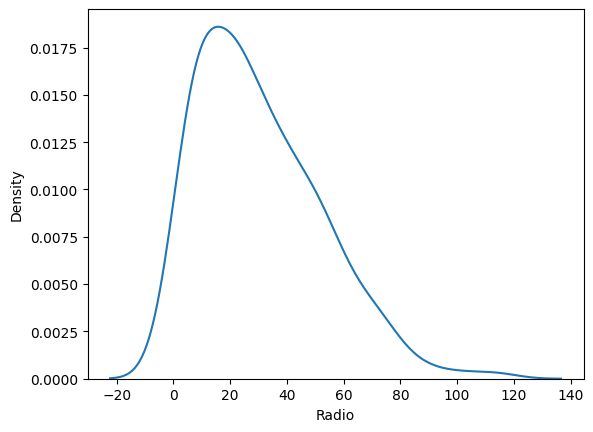

In [5]:
sns.kdeplot(data.Radio)
plt.show()

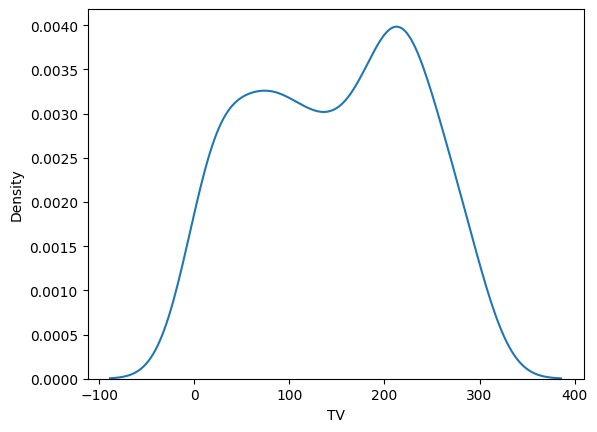

In [6]:
sns.kdeplot(data.TV)
plt.show()

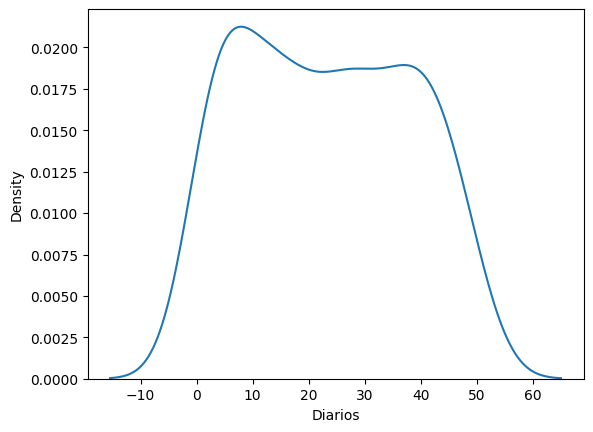

In [7]:
sns.kdeplot(data.Diarios)
plt.show()

### Prueba de normalidad
* Ho: la variable se aproxima a una distribución normal
* Ha: la variable no se aproxima a una distribución normal

In [8]:
variables = ['Ventas', 'Radio', 'TV', 'Diarios']
alpha = 0.05
for var in variables:
    stat, p_value = ss.shapiro(data[var])
    
    print(f'Prueba de normalidad para la variable {var}:')
    print(f'Estadístico de prueba: {stat:.2f}')
    print(f'P-valor: {p_value:.2f}')
    
    if p_value < alpha:
        print('La hipótesis nula (Ho) se rechaza.')
        print('La variable no se aproxima a una distribución normal.')
    else:
        print('La hipótesis nula (Ho) no se rechaza.')
        print('La variable se aproxima a una distribución normal.')
    print()

Prueba de normalidad para la variable Ventas:
Estadístico de prueba: 0.98
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.

Prueba de normalidad para la variable Radio:
Estadístico de prueba: 0.94
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.

Prueba de normalidad para la variable TV:
Estadístico de prueba: 0.95
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.

Prueba de normalidad para la variable Diarios:
Estadístico de prueba: 0.94
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
La variable no se aproxima a una distribución normal.



Prueba de Correlación
* HO: no existe correlación entre las variables
* HA: existe correlación entre las variables

In [ ]:
sns.heatmap(data.loc[:,['Ventas','Radio','TV','Diarios']].corr(method = "spearman"))
plt.show()

In [29]:
data.loc[:,['Ventas','Radio','TV','Diarios']].corr(method = "spearman")

,Ventas,Radio,TV,Diarios
Ventas,1.000000,0.194922,0.800614,0.554304
Radio,0.194922,1.000000,0.050840,0.316979
TV,0.800614,0.050840,1.000000,0.056123
Diarios,0.554304,0.316979,0.056123,1.000000


In [9]:
variables = ['Ventas', 'Radio', 'TV', 'Diarios']
alpha = 0.05
method = "spearmanr"
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        # para data no distribuida normalmente
        if method == "spearmanr": 
            correlation, p_value = ss.spearmanr(data[var1], data[var2])
            
        # para data no distribuida normalmente - preferido sobre spearman
        elif method == "kendall":
            correlation, p_value = ss.kendalltau(data[var1], data[var2])
            
        # para data distribuida normalmente
        elif method == "pearsonr":
            correlation, p_value = ss.pearsonr(data[var1], data[var2])

        
        print(f'Correlación entre {var1} y {var2}:')
        print(f'Coeficiente de correlación de {method}: {correlation:.2f}')
        print(f'P-valor: {p_value:.2f}')
        
        if p_value < alpha:
            print('La hipótesis nula (Ho) se rechaza.')
            print('Existe correlación entre las variables.')
        else:
            print('La hipótesis nula (Ho) no se rechaza.')
            print('No existe correlación entre las variables.')
        print()

Correlación entre Ventas y Radio:
Coeficiente de correlación de spearmanr: 0.19
P-valor: 0.01
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.

Correlación entre Ventas y TV:
Coeficiente de correlación de spearmanr: 0.80
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.

Correlación entre Ventas y Diarios:
Coeficiente de correlación de spearmanr: 0.55
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.

Correlación entre Radio y TV:
Coeficiente de correlación de spearmanr: 0.05
P-valor: 0.47
La hipótesis nula (Ho) no se rechaza.
No existe correlación entre las variables.

Correlación entre Radio y Diarios:
Coeficiente de correlación de spearmanr: 0.32
P-valor: 0.00
La hipótesis nula (Ho) se rechaza.
Existe correlación entre las variables.

Correlación entre TV y Diarios:
Coeficiente de correlación de spearmanr: 0.06
P-valor: 0.43
La hipótesis nula (Ho) no se rechaza.
No existe correlac

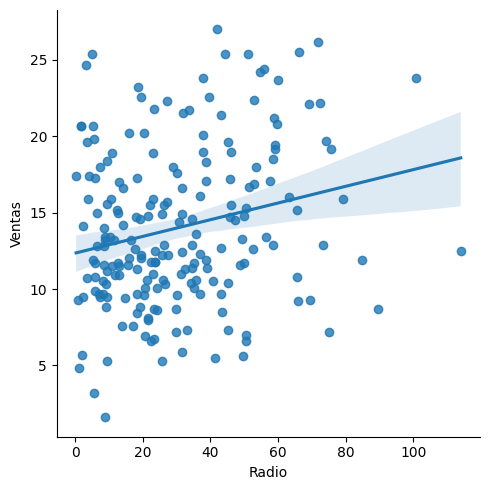

In [36]:
sns.lmplot(x='Radio',y='Ventas',data=data)
plt.show()

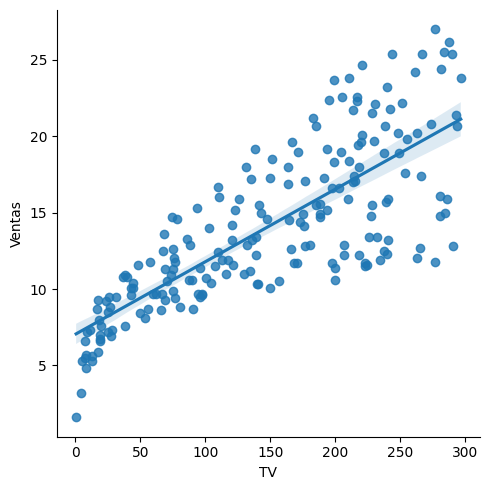

In [37]:
sns.lmplot(x='TV',y='Ventas',data=data)
plt.show()

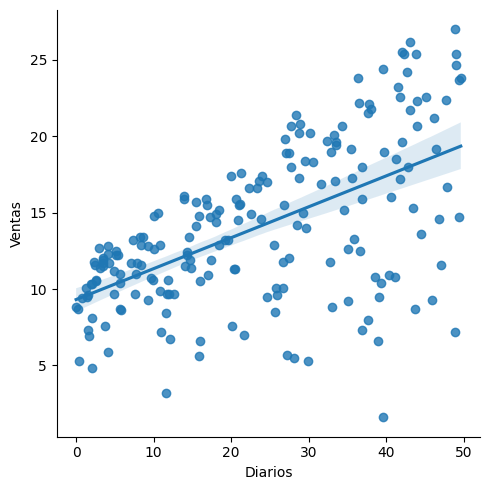

In [38]:
sns.lmplot(x='Diarios',y='Ventas',data=data)
plt.show()

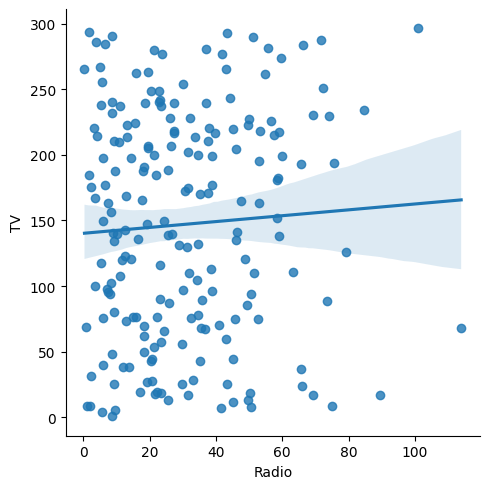

In [39]:
sns.lmplot(x='Radio',y='TV',data=data)
plt.show()

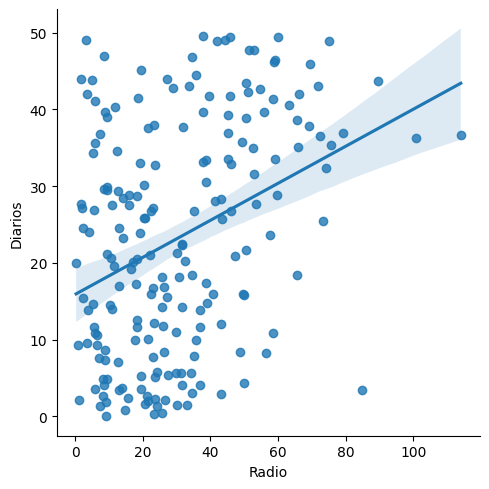

In [40]:
sns.lmplot(x='Radio',y='Diarios',data=data)
plt.show()

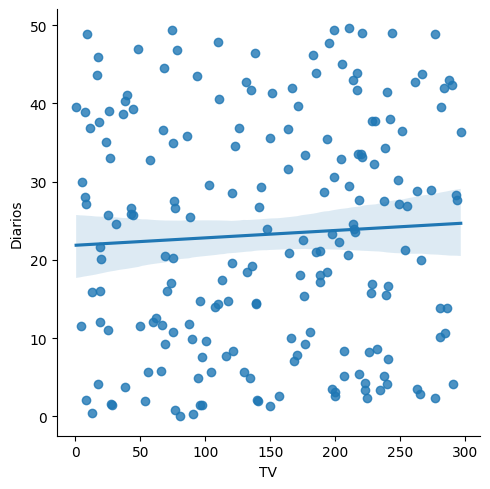

In [41]:
sns.lmplot(x='TV',y='Diarios',data=data)
plt.show()

Regresión lineal

In [11]:
modelo = smf.ols('Ventas ~ Radio + TV + Diarios', data=data).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           1.58e-96
Time:                        19:12:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
Radio         -0.0010      0.006     -0.177      0.860      -0.013       0.011
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Diarios        0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
y_pred = modelo.predict(data.iloc[:,:3])

In [59]:
pd.DataFrame({'Prediction': y_pred, 'True': data.iloc[:,3]})

,Prediction,True
0,20.523974,22.1
1,12.337855,10.4
2,12.307671,9.3
3,17.597830,18.5
4,13.188672,12.9
...,...,...
195,5.370342,7.6
196,8.165312,9.7
197,12.785921,12.8
198,23.767321,25.5


Ventas = 2.938889 + Radio-0.001037 + TV 0.045765 + Diarios 0.188530

In [44]:
modelo.params

Intercept    2.938889
Radio       -0.001037
TV           0.045765
Diarios      0.188530
dtype: float64

In [60]:
modelo.mse_resid

2.8409452188887094